# 13.1 생성 모델이란

## 13.1.1 생성 모델 개념

In [ ]:
# Discriminative model
# Generative model

## 13.1.2 생성 모델의 유형

In [ ]:
# Explicit density: Variational AutoEncoder
# Implicit density: GAN(Generative Adversarial Network)

# 13.2 변형 오토인코더

## 13.2.1 오토인코더란

In [ ]:
# 1. 인코더: Recognition network
# 2. 은닉층: Hidden layers
# 3. 디코더: Generative network
# 4. 손실 재구성

In [ ]:
# 1. 데이터 압축
# 2. 차원의 저주 예방
# 3. 특성 추출

In [1]:
# 라이브러리 호출

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 네트워크 생성

input_image = tf.keras.layers.Input(shape=(784,))
encoded_input = tf.keras.layers.Dense(32, activation='relu')(input_image)
decoded_output = tf.keras.layers.Dense(784, activation='sigmoid')(encoded_input)
autoencoder = tf.keras.models.Model(input_image, decoded_output)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-23 21:27:22.627114: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-23 21:27:22.627329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# 모델 컴파일

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
# 데이터셋 준비

(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [5]:
# 모델 훈련

autoencoder.fit(
    X_train,
    X_train,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test))

Epoch 1/30


2022-05-23 21:30:45.077243: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-23 21:30:45.207651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 6ms/step - loss: 0.2777 - val_loss: 0.1905
Epoch 2/30
 12/235 [>.............................] - ETA: 1s - loss: 0.1904

2022-05-23 21:30:46.895476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.1711 - val_loss: 0.1521
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1426 - val_loss: 0.1320
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1266 - val_loss: 0.1191
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1159 - val_loss: 0.1104
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1088 - val_loss: 0.1047
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1039 - val_loss: 0.1007
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1005 - val_loss: 0.0979
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0982 - val_loss: 0.0959
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0967 - val_loss: 0.0948
Epoch 11/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0957 - val_loss: 0.0939
Epoch 12/

2022-05-23 21:33:17.880354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


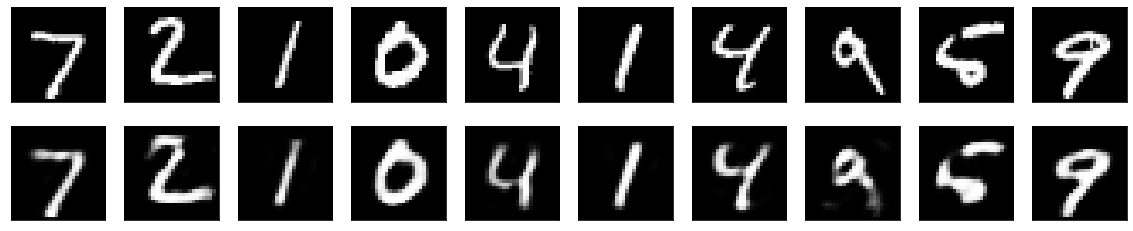

In [6]:
# 이미지 시각화

reconstructed_img = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
!pip install tensorflow_probability

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 8.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.2/105.2 kB 2.9 MB/s eta 0:00:00


In [9]:
# 필요한 라이브러리 호출

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display
import pandas as pd
import tensorflow_probability as tfp
ds = tfp.distributions

In [10]:
# 초깃값 설정

TRAIN_BUF = 60000
TEST_BUF = 10000
BATCH_SIZE = 512
N_TRAIN_BATCHES = int(TRAIN_BUF/BATCH_SIZE)
N_TEST_BATCHES = int(TEST_BUF/BATCH_SIZE)

In [12]:
# fashion_mnist 데이터셋 로딩 및 데이터셋 분리

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(512))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images).shuffle(10000).batch(512))

In [13]:
# 변형 오토인코더 네트워크 생성

class VAE(tf.keras.Model):
    def __init__(self, **kwargs):
        super(VAE, self).__init__()
        self.__dict__.update(kwargs)

        self.enc = tf.keras.Sequential(self.enc)
        self.dec = tf.keras.Sequential(self.dec)
    
    def encode(self, x):
        mu, sigma = tf.split(self.enc(x), num_or_size_splits=2, axis=1)
        return ds.MultivariateNormalDiag(loc=mu, scale_diag=sigma)

    def reparameterize(self, mean, logvar):
        epsilon = tf.random.normal(shape=mean.shape)
        return epsilon * tf.exp(logvar * 0.5) + mean
    
    def reconstruct(self, x):
        mu, _ = tf.split(self.enc(x), num_or_size_splits=2, axis=1)
        return self.decode(mu)
    
    def decode(self, z):
        return self.dec(z)
    
    def loss_function(self, x):
        q_z = self.encode(x)
        z = q_z.sample()
        x_recon = self.decode(z)
        p_z = ds.MultivariateNormalDiag(
            loc=[0.] * z.shape[-1], scale_diag=[1.] * z.shape[-1]
        )
        kl_div = ds.kl_divergence(q_z, p_z)
        latent_loss = tf.reduce_mean(tf.maximum(kl_div, 0))
        recon_loss = tf.reduce_mean(tf.reduce_sum(tf.math.square(x-x_recon), axis=0))
        return recon_loss, latent_loss

    def gradients(self, x):
        with tf.GradientTape() as tape:
            loss = self.loss_function(x)
        return tape.gradient(loss, self.trainable_variables)

    @tf.function
    def train(self, train_x):
        gradients = self.gradients(train_x)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

In [15]:
# 인코더와 디코더 네트워크 생성

encoder = [
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2,2), activation='relu'
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2,2), activation='relu'
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2*2),
]

decoder = [
    tf.keras.layers.Dense(units=7 * 7 * 64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2,2), padding='SAME', activation='relu'
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(2,2), padding='SAME', activation='relu'
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1,1), padding='SAME', activation='sigmoid'
    ),
]

In [16]:
# 모델 정의

model = VAE(
    enc=encoder,
    dec=decoder,
    optimizer=tf.keras.optimizers.Adam(1e-3)
)

In [17]:
# 모델 훈련 결과 시각화

example_data = next(iter(test_dataset))

def plot_reconstruction(model, example_data, nex=8, zm=2):
    example_data_reconstructed = model.reconstruct(example_data)
    samples = model.decode(tf.random.normal(shape=(BATCH_SIZE,2)))
    fig, axs = plt.subplots(ncols=nex, nrows=3, figsize=(zm*nex, zm*3))
    for axi, (dat, lab) in enumerate(
        zip(
            [example_data, example_data_reconstructed, samples],
            ['data', 'data recon', 'samples']
        )
    ):
        for ex in range(nex):
            axs[axi, ex].matshow(
                dat.numpy()[ex].squeeze(), cmap=plt.cm.Greys, vmin=0, vmax=1
            )
            axs[axi, ex].axes.get_xaxis().set_ticks([])
            axs[axi, ex].axes.get_yaxis().set_ticks([])
        axs[axi, 0].set_ylabel(lab)
    plt.show()

In [18]:
# 손실 정보 저장

losses = pd.DataFrame(columns=['recon_loss', 'latent_loss'])

Epoch: 49 | recon_loss: 28.502788543701172 | latent_loss: 1.7627942562103271


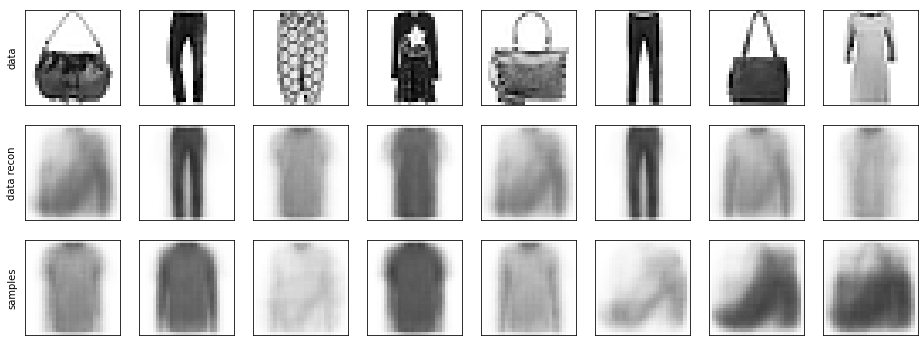

In [19]:
# 모델 훈련

n_epochs = 50

for epoch in range(n_epochs):
    for batch, train_x in tqdm(
        zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES):
        model.train(train_x)
        loss = []
    
    for batch, test_x in tqdm(
        zip(range(N_TEST_BATCHES), test_dataset), total=N_TEST_BATCHES):
        loss.append(model.loss_function(train_x))
    
    losses.loc[len(losses)] = np.mean(loss, axis=0)
    display.clear_output()
    print(
        "Epoch: {} | recon_loss: {} | latent_loss: {}".format(
            epoch, losses.recon_loss.values[-1], losses.latent_loss.values[-1]
        )
    )
    plot_reconstruction(model, example_data)

# 13.3 적대적 생성 신경망(GAN)이란

## 13.3.1 GAN 동작 원리

## 13.3.2 GAN 구현

In [20]:
# 라이브러리 호출

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.layers import Reshape, Dense, Dropout, LeakyReLU, Conv2DTranspose, Conv2D, Flatten, BatchNormalization
from tensorflow.keras import Model, Sequential
from tensorflow.keras.datasets import mnist
import time
from IPython import display

In [21]:
# MINST 데이터셋 내려받기 및 전처리

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_images = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(256)

In [22]:
# 생성자 네트워크 생성

def create_generator():
    generator = Sequential()
    generator.add(Dense(7*7*256, input_dim=100))
    generator.add(LeakyReLU(0.2))
    generator.add(Reshape((7,7,256)))
    
    generator.add(Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=True))
    generator.add(BatchNormalization())
    generator.add(LeakyReLU(0.2))
    generator.add(Dropout(0.3))

    generator.add(Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=True))
    generator.add(BatchNormalization())
    generator.add(LeakyReLU(0.2))

    generator.add(Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=True, activation='tanh'))

    return generator

g = create_generator()
g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12544)             1266944   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 7, 7, 128)        819328    
 ranspose)                                                       
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 128)        512       
 ormalization)                                                   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)        

In [23]:
# 판별자 네트워크 생성

def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,1]))
    discriminator.add(LeakyReLU())
    discriminator.add(Dropout(0.3))

    discriminator.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
    discriminator.add(LeakyReLU())
    discriminator.add(Dropout(0.3))

    discriminator.add(Flatten())
    discriminator.add(Dense(1))

    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)             

In [24]:
# 손실 함수 정의

loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def D_loss(real_output, fake_output):
    real_loss = loss_function(tf.ones_like(real_output), real_output)
    fake_loss = loss_function(tf.zeros_like(fake_output), fake_output)
    final_loss = real_loss + fake_loss

    return final_loss

def G_loss(fake_output):
    return loss_function(tf.ones_like(fake_output), fake_output)

In [25]:
# 옵테마이저 정의

G_optimizer = tf.keras.optimizers.Adam()
D_optimizer = tf.keras.optimizers.Adam()

In [26]:
# 파라미터 초깃값 설정

noise_dim = 100
num_of_generated_examples = 16
BATCH_SIZE = 1

seed = tf.random.normal([num_of_generated_examples, noise_dim])

In [27]:
# 모델 훈련을 위한 파이프라인 정의

generator = create_generator()
discriminator = create_discriminator()

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = G_loss(fake_output)
        disc_loss = D_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        G_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        D_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [28]:
# 생성된 이미지 출력 함수

def generate_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i,:,:,0] * 127.5 + 127.5, cmap='rainbow')

In [29]:
# 모델 훈련 함수

def train_GAN(datasets, epochs):
    for epoch in range(epochs):
        start = time.time()
        for image_batch in datasets:
            train_step(image_batch)
        if epoch % 10 == 0:
            generate_images(generator, epoch+1, seed)
        
        print('Epoch {}: {}s'.format(epoch+1, time.time() - start))
    
    generate_images(generator, epochs, seed)

Epoch 1: 9.295021057128906s
Epoch 2: 9.13696813583374s
Epoch 3: 9.110244035720825s
Epoch 4: 9.12420916557312s
Epoch 5: 9.13275694847107s
Epoch 6: 9.108514070510864s
Epoch 7: 9.112054824829102s
Epoch 8: 9.10873007774353s
Epoch 9: 9.102738857269287s
Epoch 10: 9.110341310501099s
Epoch 11: 9.23319125175476s
Epoch 12: 9.11309289932251s
Epoch 13: 9.11312985420227s
Epoch 14: 9.102952003479004s
Epoch 15: 9.101317167282104s
Epoch 16: 9.113685131072998s
Epoch 17: 9.112866878509521s
Epoch 18: 9.124651908874512s
Epoch 19: 9.099583864212036s
Epoch 20: 9.105103015899658s
Epoch 21: 9.341634750366211s
Epoch 22: 9.115922927856445s
Epoch 23: 9.127779960632324s
Epoch 24: 9.09670090675354s
Epoch 25: 9.105680704116821s
Epoch 26: 9.101256132125854s
Epoch 27: 9.108028888702393s
Epoch 28: 9.11195182800293s
Epoch 29: 9.109944820404053s
Epoch 30: 9.11866307258606s
Epoch 31: 9.206029176712036s
Epoch 32: 9.111759901046753s
Epoch 33: 9.369340896606445s
Epoch 34: 9.211595058441162s
Epoch 35: 9.142024993896484s
Epoc

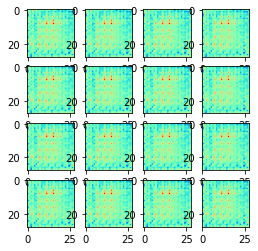

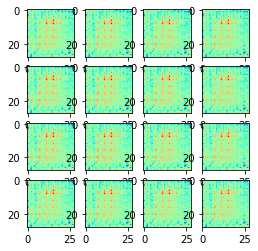

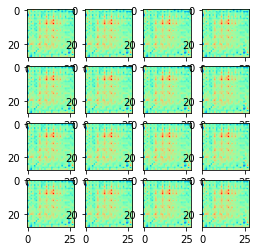

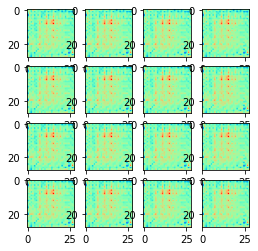

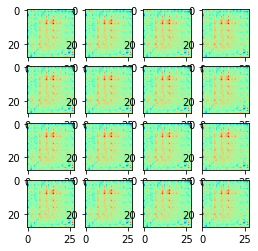

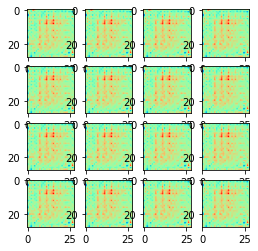

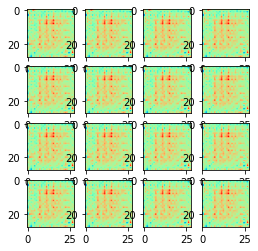

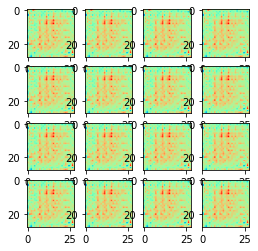

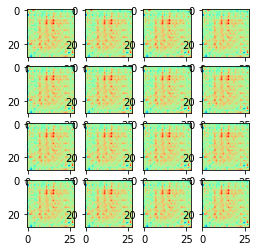

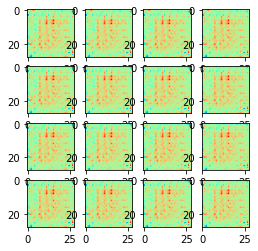

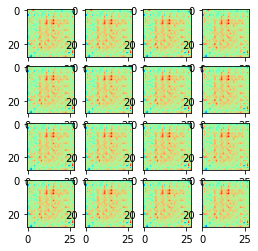

In [31]:
# 모델 훈련 및 생성 이미지 출력

train_GAN(train_dataset, 100)

# 13.4 GAN 파생 기술

## 13.4.1 DCGAN

## 13.4.2 cGAN

## 13.4.3 CycleGAN